In [1]:
!pip install tensorflow==2.16.1

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.8/377.1 MB 1.4 MB/s eta 0:04:30
   ---------------------------------------- 1.0/377.1 MB 1.4 MB/s eta 0:04:37
   ---------------------------------------- 1.3/377.1 MB 1.4 MB/s eta 0:04:24
   ---------------------------------------- 1.8/377.1 MB 1.7 MB/s eta 0:03:44
   --------------------------------

## Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf  # tf version == 2.13.0

## Load the model
#### The model is a Convolutional Neural Network Trained on 10 classes of tomato diseases and 90 % accuracy obtained

In [4]:
model_path = r'C:\Users\Dell\Desktop\FINAL  YEAR PROJECT\tomatoes (2).h5'
model = tf.keras.models.load_model(model_path,compile = False)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate as necessary
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



## Capture and load an image

In [10]:
captured_image = r'C:\Users\Dell\Desktop\FINAL  YEAR PROJECT\TEST_Tomato.jpg'

## Preprocessing the image and make a prediction

#### 1. Scale the image by (3,3) .....this maintains the size of the image after fragmenting.

#### 2. Break the image into 9 segments (3,3)

#### 3. For each segment, convert to the target size, as neede for feeding into the neural network.
 (If Required)

#### 4. Make a prediction on each fragment

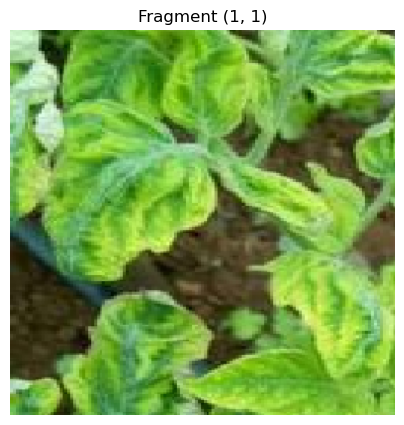

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Tomato_Yellow_Leaf_Curl_Virus


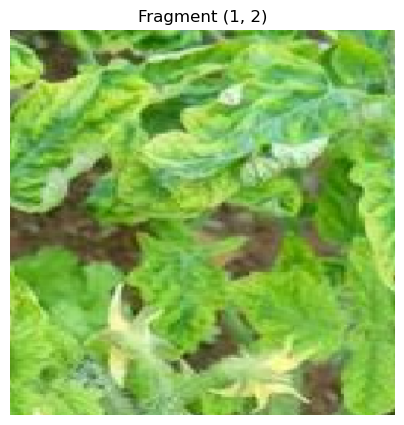

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Septoria_leaf_spot


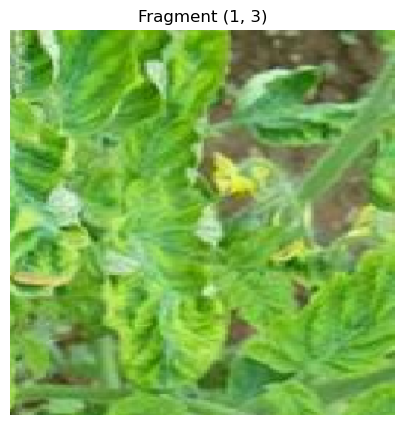

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tomato_Yellow_Leaf_Curl_Virus


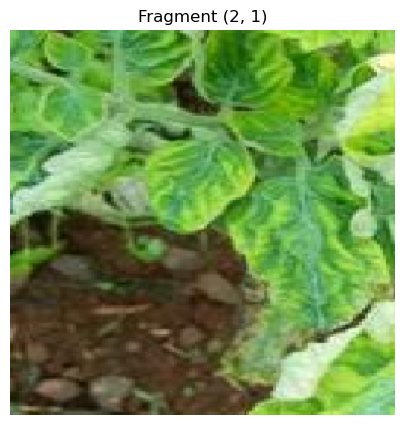

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Tomato_Yellow_Leaf_Curl_Virus


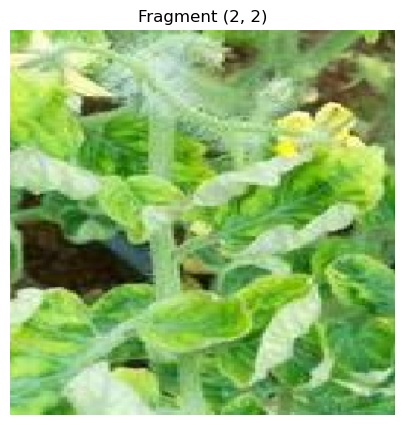

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Tomato_Yellow_Leaf_Curl_Virus


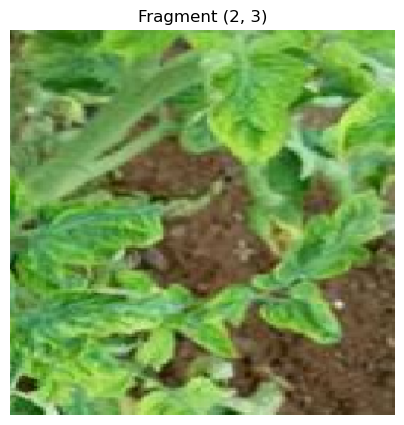

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Late_blight


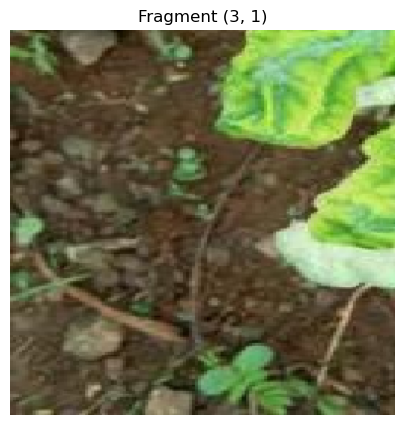

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Late_blight


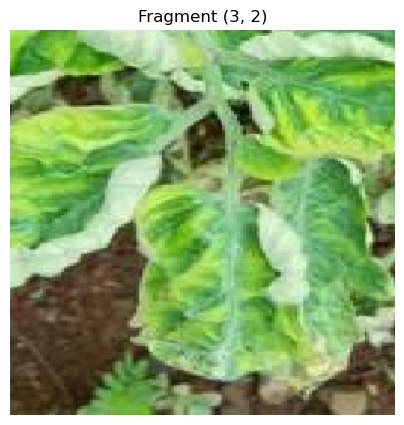

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Tomato_Yellow_Leaf_Curl_Virus


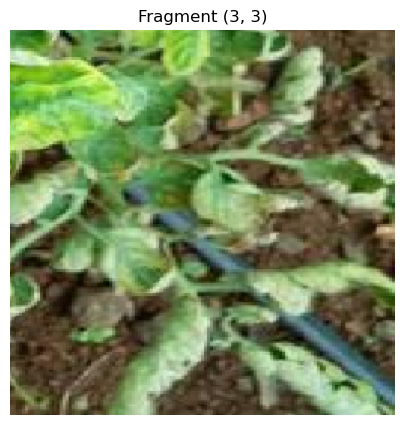

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Septoria_leaf_spot
[0, 0, 2, 0, 2, 0, 0, 5, 0, 0]


In [11]:
# setup variables
n_rows = 3
n_cols = 3
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Each time a disease is detected, count increments correspondingly


# 1. Scale the image by (3,3) .....this maintains the size of the image after fragmenting.
target_size = (256*n_rows, 256*n_cols)
captured_image = keras.preprocessing.image.load_img(captured_image, target_size=target_size)
img = keras.preprocessing.image.img_to_array(captured_image)

# 2. Break the image into 9 segments (3,3)
fragment_height = target_size[0] // n_rows
fragment_width = target_size[1]// n_cols
for i in range(n_rows):
        for j in range(n_cols):
            start_row = i * fragment_height
            end_row = (i + 1) * fragment_height
            start_col = j * fragment_width
            end_col = (j + 1) * fragment_width

            fragment = img[start_row:end_row, start_col:end_col, :]

            # Display the fragment
            plt.figure(figsize=(5, 5))
            plt.imshow(fragment/255.0)
            plt.title(f"Fragment ({i+1}, {j+1})")
            plt.axis('off')
            plt.show()

            # 3. For each segment, convert to the target size, as needed for feeding into the neural network. (If Required)

            x = keras.preprocessing.image.img_to_array(fragment)
            x = np.expand_dims(x, axis=0)

            # 4. Make a prediction
            preds = model.predict(x)
            preds=np.argmax(preds, axis=1)[0]
            count[preds]+=1

            if preds==0:
                print("Bacterial_spot")
            elif preds==1:
                print("Early_blight")
            elif preds==2:
                print("Late_blight")
            elif preds==3:
                print("Leaf_Mold")
            elif preds==4:
                print("Septoria_leaf_spot")
            elif preds==5:
                print("Spider_mites Two-spotted_spider_mite")
            elif preds==6:
                print("Target_Spot")
            elif preds==7:
                print("Tomato_Yellow_Leaf_Curl_Virus")
            elif preds==8:
                print("Tomato_mosaic_virus")
            else:
                print("Healthy")

print(count)


## Complete Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf  # tf version == 2.13.0

model_path = '/content/tomatoes.h5'
captured_image = '/content/TOMATO_TEST.jpg'
n_rows = 3
n_cols = 3
target_size = (256*n_rows, 256*n_cols)
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


model = tf.keras.models.load_model(model_path)

captured_image = keras.preprocessing.image.load_img(captured_image, target_size=target_size)
img = keras.preprocessing.image.img_to_array(captured_image)
fragment_height = target_size[0] // n_rows
fragment_width = target_size[1]// n_cols
for i in range(n_rows):
        for j in range(n_cols):
            start_row = i * fragment_height
            end_row = (i + 1) * fragment_height
            start_col = j * fragment_width
            end_col = (j + 1) * fragment_width

            fragment = img[start_row:end_row, start_col:end_col, :]

            x = keras.preprocessing.image.img_to_array(fragment)
            x = np.expand_dims(x, axis=0)
            preds = model.predict(x)
            preds=np.argmax(preds, axis=1)[0]
            count[preds]+=1

            if preds==0:
                print("Bacterial_spot")
            elif preds==1:
                print("Early_blight")
            elif preds==2:
                print("Late_blight")
            elif preds==3:
                print("Leaf_Mold")
            elif preds==4:
                print("Septoria_leaf_spot")
            elif preds==5:
                print("Spider_mites Two-spotted_spider_mite")
            elif preds==6:
                print("Target_Spot")
            elif preds==7:
                print("Tomato_Yellow_Leaf_Curl_Virus")
            elif preds==8:
                print("Tomato_mosaic_virus")
            else:
                print("Healthy")

print(count)
